In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
pos_data = pd.read_excel("./MIT POS data.xlsx", sheet_name=1)
mov_data = pd.read_excel("./MIT movement data.xlsx", sheet_name=1)

## Descriptive analysis

### Materials distributions

In [3]:
pos_data.material.value_counts()

50044    13710
50045    11115
50049     1715
50224     1449
50223     1199
50222      751
50048      102
Name: material, dtype: int64

In [4]:
mov_data.material.value_counts()

50044    648
50045    646
50049    361
50223    162
50224    146
50222    116
50048     49
Name: material, dtype: int64

### Dates and day part distributions

In [5]:
pos_data.posting_date_id.nunique()

35

In [6]:
mov_data.pstng_date.nunique()

35

In [7]:
len(set(mov_data.pstng_date.unique()).intersection(pos_data.posting_date_id.unique()))

35

### Unit distributions

In [8]:
pos_data.sales_unit.value_counts()

EA     26597
PAK     3335
KAR      109
Name: sales_unit, dtype: int64

In [9]:
mov_data.loc[:, ["base_uom", "po_unit", "unit"]].value_counts()

base_uom  po_unit  unit
EA        EA       EA      1294
PAK       KAR      KAR      424
EA        CS       CS       410
dtype: int64

Some materials are sold in KAR although we received them as PAK 

In [10]:
mov_data.assign(
    buom_per_unit_of_entry=lambda x: x.qty_in_buom / x.qty_in_unit_of_entry
).loc[
    :, ["base_uom", "po_unit", "buom_per_unit_of_entry"]
].value_counts().reset_index().sort_values(["base_uom", "po_unit"])

,base_uom,po_unit,buom_per_unit_of_entry,0
2,EA,CS,5.0,410
0,EA,EA,1.0,1294
1,PAK,KAR,10.0,424


In [11]:
pos_data[
    pos_data.sales_unit == "KAR"
].sales_qty_buom.value_counts()

 10    95
-10     7
 20     5
 30     2
Name: sales_qty_buom, dtype: int64

In [12]:
pos_data.loc[
    pos_data[
        pos_data.sales_unit == "KAR"
    ].index,
    "sales_unit"
] = "PAK"

We can safely change them to PAK are they are sold in multiples of 10 in buom units

### Zero sales or retail amount

In [13]:
pos_data[(pos_data.sales_qty_buom == 0)].retail_amount.value_counts()

0.0    10940
Name: retail_amount, dtype: int64

In [14]:
pos_data[(pos_data.retail_amount == 0.0)].sales_qty_buom.value_counts()

0    10940
1       11
Name: sales_qty_buom, dtype: int64

In [15]:
mov_data[(mov_data.qty_in_buom == 0) | (mov_data.qty_in_unit_of_entry == 0)]

,pstng_date,base_uom,material,unit,po_unit,qty_in_buom,qty_in_unit_of_entry


### Possible duplicates

In [16]:
pos_data.transaction_id.value_counts()[
    pos_data.transaction_id.value_counts() > 1
]

a86065cb7502258c52aeb0dd8b3fadbd8acebe7c5c9a1f558b831d8ed52e418d    12
32d43822ccd2f62dd80a4a2fa31077749f9e2494d82a4ba6647297dcb57cb6d8    12
45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e420c59f856a997d9d6b    10
8993e347e5aea59809de45b11e947564edf33b8a1651e6711fed7b768ea440f8     9
518edd17564925840f82e26456b9fa1be08b80882d88230392a5e57ea0e7c386     8
                                                                    ..
dde006f7f98b95d708d47e07ea29c62b916338195eac075d34962d2f1037afb1     2
05c07b1e0f2fa2d6ac13a826d53a57d9f425a40d2874dabd10bcf658d4d23006     2
ee5312048b0ac5eeb780449d56bc70d97b4d350357f3a8897502b88f7d14da6e     2
d6b9b23945cd3faf0789358f87cc496594362831a66cafdccafea048ad1d128b     2
2c02e1692c764be0be6a79775786b1cfa592116853ec1ffe526c9bd7e6bf3d97     2
Name: transaction_id, Length: 9930, dtype: int64

In [17]:
pos_data[
    pos_data.transaction_id == "45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e420c59f856a997d9d6b"
]

,transaction_id,material,day_part_id,sales_unit,retail_amount,sales_qty_buom,posting_date_id
5549,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50044,2,EA,-1.0,-1,20190101
5550,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50045,2,EA,0.0,0,20190101
5901,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50045,2,EA,1.0,1,20190101
5907,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50045,2,EA,-1.0,-1,20190101
10083,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50045,2,EA,1.0,1,20190101
13840,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50045,2,EA,-1.0,-1,20190101
17291,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50044,2,EA,-1.0,-1,20190101
21023,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50044,2,EA,1.0,1,20190101
21380,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50044,2,EA,1.0,1,20190101
28915,45a8e98d62d499f03f2690777d23dafa0cbbd76325e9e4...,50044,2,EA,0.0,0,20190101


In [18]:
pos_data[
    pos_data.transaction_id == "2c02e1692c764be0be6a79775786b1cfa592116853ec1ffe526c9bd7e6bf3d97"
]

,transaction_id,material,day_part_id,sales_unit,retail_amount,sales_qty_buom,posting_date_id
5448,2c02e1692c764be0be6a79775786b1cfa592116853ec1f...,50045,2,EA,1.0,1,20190203
20546,2c02e1692c764be0be6a79775786b1cfa592116853ec1f...,50045,2,EA,0.0,0,20190203


In [19]:
mov_data.value_counts()[mov_data.value_counts() > 1]

pstng_date  base_uom  material  unit  po_unit  qty_in_buom  qty_in_unit_of_entry
20190202    EA        50045     EA    EA       22           22                      32
20190108    EA        50045     EA    EA       22           22                      30
20190105    EA        50044     EA    EA       22           22                      30
20190112    EA        50045     EA    EA       22           22                      30
20190131    EA        50045     EA    EA       22           22                      28
                                                                                    ..
20190119    EA        50049     CS    CS       5            1                        2
20190121    EA        50044     EA    EA       22           22                       2
20190120    EA        50045     EA    EA       44           44                       2
20190119    PAK       50222     KAR   KAR      10           1                        2
20190117    EA        50044     EA    EA       44

In [20]:
mov_data[
    mov_data.duplicated()
].sort_values(["material", "pstng_date", "qty_in_buom"])

,pstng_date,base_uom,material,unit,po_unit,qty_in_buom,qty_in_unit_of_entry
1057,20181231,EA,50044,EA,EA,22,22
2124,20181231,EA,50044,EA,EA,22,22
2125,20181231,EA,50044,EA,EA,22,22
2126,20181231,EA,50044,EA,EA,22,22
2127,20181231,EA,50044,EA,EA,22,22
...,...,...,...,...,...,...,...
843,20190201,PAK,50224,KAR,KAR,10,1
1691,20190201,PAK,50224,KAR,KAR,10,1
1982,20190202,PAK,50224,KAR,KAR,10,1
1538,20190203,PAK,50224,KAR,KAR,10,1


In [21]:
mov_data[
    mov_data.duplicated()
].material.value_counts()

50045    587
50044    573
50049    276
50223    104
50224     98
50222     69
50048     16
Name: material, dtype: int64

In [22]:
mov_data = mov_data.drop_duplicates()

### Comparing sales and orders

In [23]:
sales = pos_data.groupby(["posting_date_id", "material", "sales_unit"]).sales_qty_buom.sum().reset_index()

In [24]:
shipments = mov_data.groupby(["pstng_date", "material", "base_uom"]).qty_in_buom.sum().reset_index()

In [25]:
sales_and_shipments = pd.merge(
    sales.rename(
        columns={"posting_date_id":"posting_date"}
    ),
    shipments.rename(
        columns={"pstng_date":"posting_date", "base_uom": "sales_unit", "qty_in_buom": "shipment_qty_buom" }
    ),
    on=["posting_date", "material", "sales_unit"],
    how="outer"
).fillna(0)


# Remove sales_unit as it is correctly computed?? PAK -> EA, KAR -> EA
sales_and_shipments = sales_and_shipments.groupby(["posting_date", "material"]).sum().reset_index()
    
sales_and_shipments.posting_date = pd.to_datetime(sales_and_shipments.posting_date, format="%Y%m%d")
sales_and_shipments.material = sales_and_shipments.material.astype(str)

In [26]:
sales_and_shipments

,posting_date,material,sales_qty_buom,shipment_qty_buom
0,2018-12-31,50044,272.0,66.0
1,2018-12-31,50045,231.0,22.0
2,2018-12-31,50048,1.0,5.0
3,2018-12-31,50049,81.0,30.0
4,2018-12-31,50222,37.0,30.0
...,...,...,...,...
240,2019-02-03,50048,7.0,5.0
241,2019-02-03,50049,50.0,15.0
242,2019-02-03,50222,40.0,10.0
243,2019-02-03,50223,84.0,10.0


50044


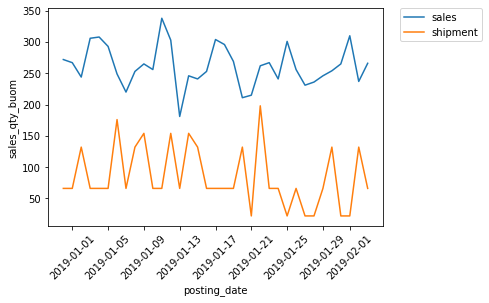

50045


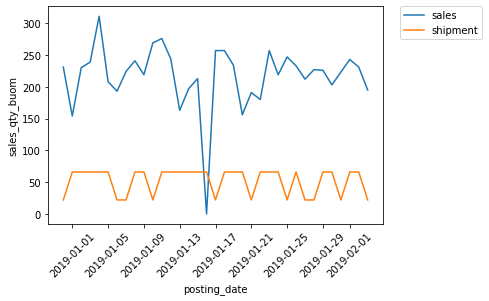

50048


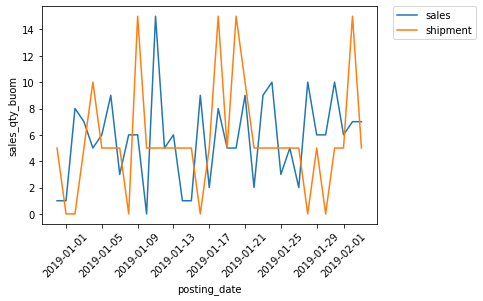

50049


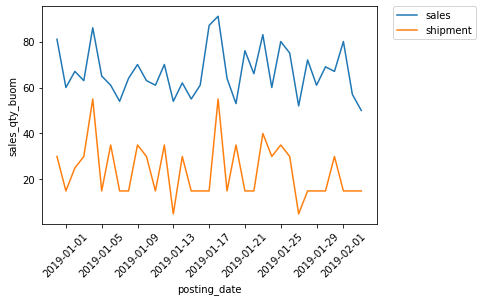

50222


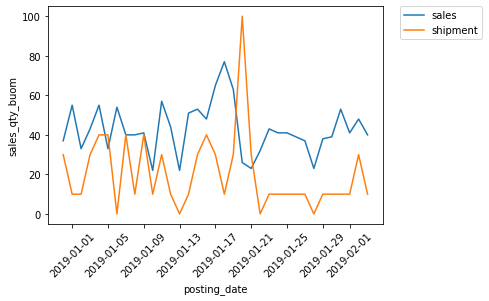

50223


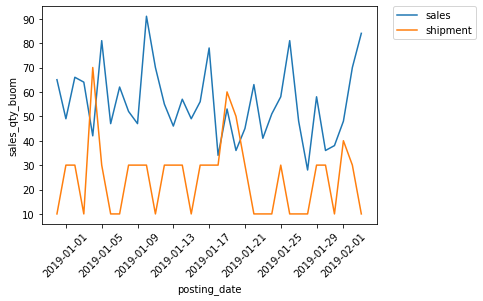

50224


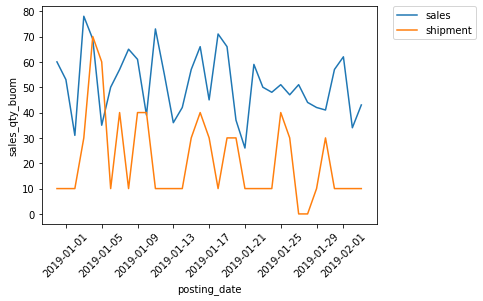

In [27]:
for material in sales_and_shipments.material.unique():
    
    print(material)
    _ = sns.lineplot(
        data=sales_and_shipments[sales_and_shipments.material == material],
        x="posting_date",
        y="sales_qty_buom",
        label="sales"
    )
    
    _ = sns.lineplot(
        data=sales_and_shipments[sales_and_shipments.material == material],
        x="posting_date",
        y="shipment_qty_buom",
        label="shipment"
    )
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    _ = plt.xticks(rotation=45)
    plt.show()